# Objective 1: I understand multiple ways to display mathematics using software packages. #

## Find the area of a closed regular polygon with $ n $ sides with length $ l $ and interior angles $ a $.

### Examples of a point, line, tringle, square, and pentagon are plotted below. Demonstrate how the $ P $ = Perimeter, $ A $ = Area, and $ a $ changes as $ n $ gets bigger.

#### Point

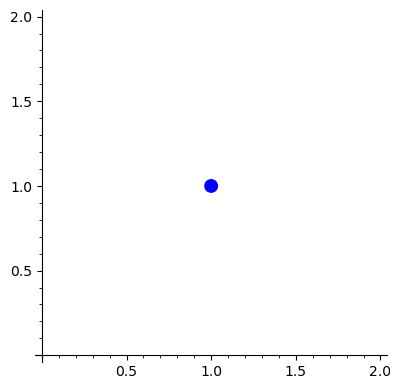

In [1]:
var('z,y,x')
z = [(1,1)]
y = points(z, pointsize=100, color='blue', zorder=1)
x = polygon(z, thickness = 2, color='powderblue', zorder=-1)
(y+x).show()

The plot above shows for $ n = 0 $, $ l = 0 $, and $ a = 0 $, that $ P = 0 $ and $ A = 0 $.

#### Line

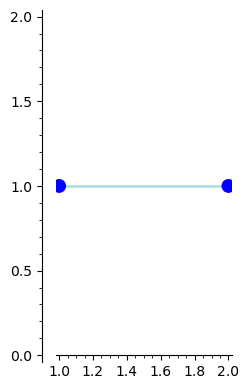

In [2]:
var('z,y,x')
z = [(1,1),(2,1)]
y = points(z, pointsize=100, color='blue', zorder=1)
x = polygon(z, thickness = 2, color='powderblue', zorder=-1)
(y+x).show()

The plot above shows for $ n = 1 $, $ l = 1 $, and $ a = 0 $, that $ P = 0 $ and $ A = 0 $.

#### Triangle

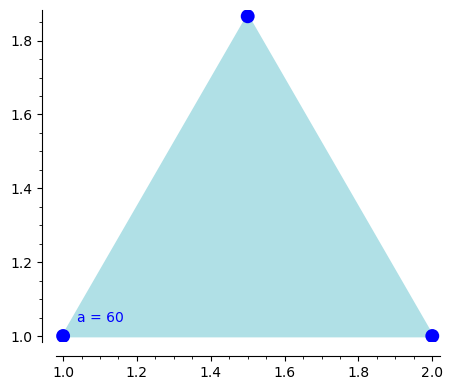

In [3]:
var('z,y,x')
z = [(1,1), (3/2,(1+sqrt(3)/2)), (2,1)]
y = points(z, pointsize=100, color='blue', zorder=1)
x = polygon(z, thickness = 2, color='powderblue', zorder=-1)
(y+x+text('a = 60',(11/10,21/20))).show()

The plot above shows for $ n = 3 $, $ l = 1 $, and $ a = 60\degree $, that $ A = 0.43301 $.

#### Square

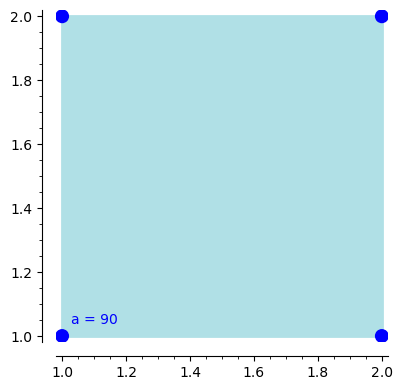

In [4]:
var('z,y,x')
z = [(1,1), (1,2), (2,2), (2,1)]
y = points(z, pointsize=100, color='blue', zorder=1)
x = polygon(z, thickness = 2, color='powderblue', zorder=-1)
(y+x+text('a = 90',(11/10,21/20))).show()

The plot above shows for $ n = 4 $, $ l = 1 $, and $ a = 90\degree $, that $ P = 4 $ and $ A = 1 $.

#### Pentagon

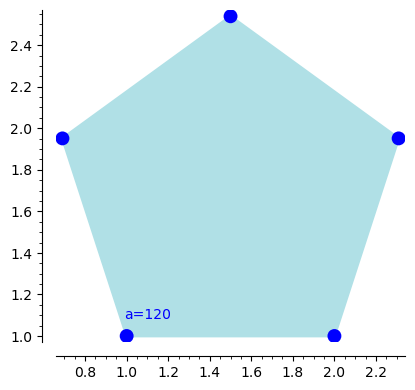

In [5]:
var('z,y,x')
z = [(1,1),(2,1),((2+(sqrt(5)-1)/4),(1+(sqrt(10+2*sqrt(5)))/4)),(3/2,(1+(sqrt(5+2*sqrt(5))/2))),((1-(sqrt(5)-1)/4),(1+(sqrt(10+2*sqrt(5)))/4))]
y = points(z, pointsize=100, color='blue', zorder=1)
x = polygon(z, thickness = 2, color='powderblue', zorder=-1)
(y+x+text('a=120',(11/10,11/10))).show()

The plot above shows for $ n = 5 $, $ l = 1 $, and $ a = 120\degree $, that $ P = 5 $ and $ A = 1.72048 $.

### The interior angles can be found by

>$ a = $$ 180(n-2)\over n $ for $ n>2 $.

### As $n$ approaches infinity, the interior angle $ a $ approaches   $ 180\degree $.

In [6]:
var('n')
limit(180*(n-2)/n,n=oo)

180

### Define a function
>My_Area_Regular_Polygon

which will return the area of a regular polygon with side lengths $ l $ and number of sides $ n $.

In [1]:
l = CC(input('Length of each side:'))
n = int(input('Number of sides:'))
def Polygon(l,n):
    if n < 2 and l <= 0:
        print('The number of side lengths must be greater than 2 to compute the area of a regular polygon. The lengths of each must be greater than 0 to compute the area of a regular polygon.')
    elif n <= 2:
        print('The number of side lengths must be greater than 2 to compute the area of a regular polygon.')
    elif l <= 0:
        print('The lengths of each side must be greater than 0 to compute the area of a regular polygon')
    else:
        return(CC((n*(l**2))/(4*tan((pi/n)))))
print(Polygon(l,n))

Length of each side: 458.86768

Number of sides: 34

1.93145448991750e7


#### Prove the formula used to find the area of a regular polygon.
The formula I used to calculate the area of a regular polygon is shown below:
> $ A = $$ nl^2\over4tan(\pi/n) $
where $ n = $ number of sides and $ l = $ length of the sides.

### Consider a regular pentagon which I will break down into triangles.

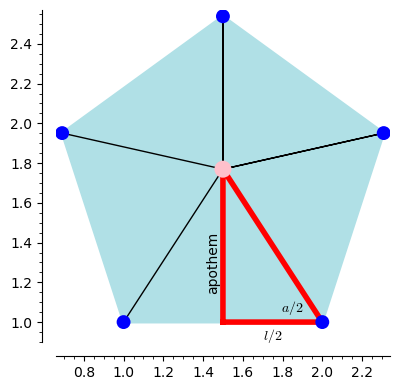

In [8]:
var('z,y,x')
vertexes = [(1,1),(2,1),((2+(sqrt(5)-1)/4),(1+(sqrt(10+2*sqrt(5)))/4)),(3/2,(1+(sqrt(5+2*sqrt(5))/2))),((1-(sqrt(5)-1)/4),(1+(sqrt(10+2*sqrt(5)))/4))]
y = points(vertexes, pointsize=100, color='blue', zorder=11)
x = polygon(vertexes, thickness = 2, color='powderblue', zorder=-1)
pentagon_plot = (y+x)

centerpoint = [(3/2,(1+(sqrt(5+2*sqrt(5))/4)))]
centerpoint_plot = points(centerpoint[0], color='pink', size = 150, zorder=3)

triangles_plot = line([vertexes[0],centerpoint[0],vertexes[1],centerpoint[0],vertexes[2],centerpoint[0],vertexes[3],centerpoint[0],vertexes[4]], color = 'black',zorder=0)

rt_plot = line([(3/2,1),centerpoint[0],vertexes[1],(3/2,1)], color = 'red', thickness = 4, zorder=1)

show(pentagon_plot + centerpoint_plot + triangles_plot + rt_plot + text("$a/2$", (1.85,1.07), color='black') + text("apothem",(1.45,1.3), rotation="vertical", color='black') + text("$l/2$", (1.75,.93), color='black'))

#### Solve for Apothem.

In [9]:
n = 5 #number of sides
l = 1 #side length
a = (n-2)*180/n #interior angle formula
apothem = var('apothem')
solve(tan(a/2) == apothem/(l/2), apothem) #trigonometry

[apothem == 1/2*tan(54)]

Now, we have a value for the apothem or the height of the larger triangle.

#### Solve for area of regular pentagon and compare to my function.

In [10]:
n = 5
l = 1
apothem = N(tan(54*pi/180)/2) #numerical approximation for apothem
Area_triangle=l*apothem/2 #area of black triangle
Area_pentagon=n*Area_triangle #n black triangles in pentagon
show("Using my derivation:", Area_pentagon)
show("Using my function:", Polygon(l,n))

'Using my derivation:' 1.72047740058897

'Using my function:' 1.72047740058897

### Consider a regular polygon broken into triangles.

In [11]:
n,l = var('n,l')
a = (n-2)*180/n
apothem = var('apothem')
solve(tan(a/2) == apothem/(l/2), apothem)

[apothem == -1/2*l*tan(180/n - 90)]

Now, we have a value for the apothem or the height of the larger triangle.

#### Solve for area of regular polygon and compare to my function.

In [12]:
apothem = -1/2*l*tan((180/n - 90)*pi/180)
Area_triangle=1/2*l*apothem
Area_Regular_Polygon=n*Area_triangle
show(Area_Regular_Polygon)

-1/4*l^2*n*tan(-1/2*pi + pi/n)

#### Checking its validity

In [13]:
bool((n*(l**2))/(4*tan((pi/n))) == Area_Regular_Polygon)

True

# Objective 2: I am able to explore unknown mathematical conjectures and provide evidence one way or the other for their validity using mathematical software. #
## The [Collatz Conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture) concerns a sequence starting with any positive integer $n$.  If the previous term is even, the next term is one half of the previous term. If the previous term is odd, the next term is 3 times the previous term plus 1. The conjecture is that no matter what value of $n$, the sequence will always reach 1. ##
### Function returns a sequence which starts with $n$ and goes through Collatz Conditions, ending with 1: ###

In [14]:
def Collatz_Conjecture(n):
    Collatz = [n]
    while n != 1:
        if n%2 != 0:
            n = 3*n + 1
            Collatz.append(n)
        else:
            n = n/2
            Collatz.append(n)
    return Collatz
Collatz_Conjecture(11)

[11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]

## Checking if it works for the first 10,000 integers. ##

In [15]:
if all([Collatz_Conjecture(n)] for n in range(1,10001)) == True:
    print(True)

True


### Relationship between $n$ and the lengths of the sequences. ###

In [16]:
for n in range(1,26):
    print((n, len(Collatz_Conjecture(n))))

(1, 1)
(2, 2)
(3, 8)
(4, 3)
(5, 6)
(6, 9)
(7, 17)
(8, 4)
(9, 20)
(10, 7)
(11, 15)
(12, 10)
(13, 10)
(14, 18)
(15, 18)
(16, 5)
(17, 13)
(18, 21)
(19, 21)
(20, 8)
(21, 8)
(22, 16)
(23, 16)
(24, 11)
(25, 24)


##### I can not see much of a pattern from the first 25 positive integers besides some clumping.  I will plot the points for the first 10,000 integers in a plot to see if there are any patterns with the sequence length.

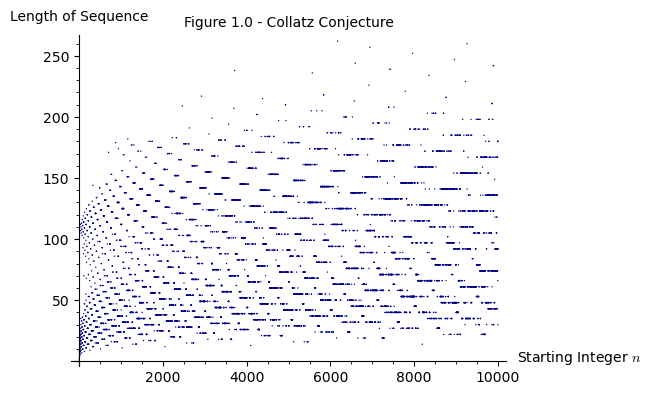

In [17]:
Collatz1Point0 = list_plot([(n,len(Collatz_Conjecture(n))) for n in range(1,10001)],color = 'darkblue',size=1,title = 'Figure 1.0 - Collatz Conjecture', axes_labels=["Starting Integer $n$","Length of Sequence"])
Collatz1Point0.axes_labels_size(1)
Collatz1Point0

There seems to be a relationship between the length of the sequences with starting integer n and the integer n.  However, its relationship cannot be described easily.

### Animation of the relationship between $n$ and the lengths of the sequences. ###

In [18]:
frames = [list_plot([(n,len(Collatz_Conjecture(n))) for n in range(1,1001*k)], color='darkblue', size=1) for k in range(0,11)]
v = animate(frames, xmax=10001, ymax=250, figsize=[5,3])
v.show()

The animation I created above shows the relationship between the integer n and the length of its sequence under the Collatz conjecture.

#### Graphic of Collatz integers that lead to a sequence of length 10 or less.

In [19]:
[(Collatz_Conjecture(n)) for n in range(1,10001) if len(Collatz_Conjecture(n)) < 11] #Collatz Sequences less than 10

[[1],
 [2, 1],
 [3, 10, 5, 16, 8, 4, 2, 1],
 [4, 2, 1],
 [5, 16, 8, 4, 2, 1],
 [6, 3, 10, 5, 16, 8, 4, 2, 1],
 [8, 4, 2, 1],
 [10, 5, 16, 8, 4, 2, 1],
 [12, 6, 3, 10, 5, 16, 8, 4, 2, 1],
 [13, 40, 20, 10, 5, 16, 8, 4, 2, 1],
 [16, 8, 4, 2, 1],
 [20, 10, 5, 16, 8, 4, 2, 1],
 [21, 64, 32, 16, 8, 4, 2, 1],
 [32, 16, 8, 4, 2, 1],
 [40, 20, 10, 5, 16, 8, 4, 2, 1],
 [42, 21, 64, 32, 16, 8, 4, 2, 1],
 [64, 32, 16, 8, 4, 2, 1],
 [80, 40, 20, 10, 5, 16, 8, 4, 2, 1],
 [84, 42, 21, 64, 32, 16, 8, 4, 2, 1],
 [85, 256, 128, 64, 32, 16, 8, 4, 2, 1],
 [128, 64, 32, 16, 8, 4, 2, 1],
 [256, 128, 64, 32, 16, 8, 4, 2, 1],
 [512, 256, 128, 64, 32, 16, 8, 4, 2, 1]]

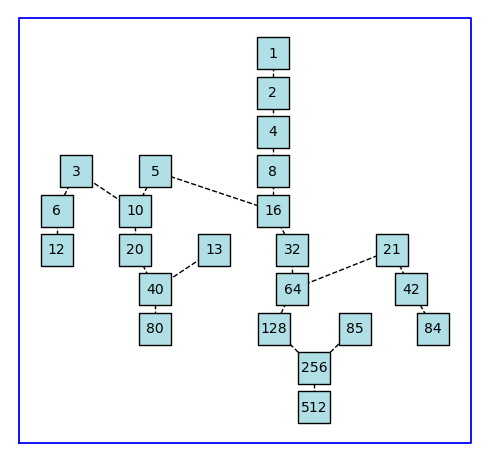

In [20]:
def CollatzLength(z):
    m = []
    for n in range(1,2^(z-1)+1): #only way to decrease number in sequence is by dividing by 2; largest n is 2^(z-1); looping through n integers
        if len(Collatz_Conjecture(n)) == z: 
            for i in range(0,z-1):
                a = Collatz_Conjecture(n)[i]
                b = Collatz_Conjecture(n)[i+1]
                m.append((a,b))
    G = Graph(m)
    a = G.plot(layout="graphviz", vertex_color='powderblue', vertex_size=500, edge_style="--", vertex_shape='s', graph_border=True)
    a.show(figsize=[5,5],aspect_ratio=1/2)
CollatzLength(10)

### Relationship between $n$ and the average of the sequence values. ###

In [21]:
def Collatz_Averages(n):
    Collatz = [n]
    while n != 1:
        if n%2 != 0:
            n = 3*n + 1
            Collatz.append(n)
        else:
            n = n/2
            Collatz.append(n)
    return N(sum(Collatz)/len(Collatz))

In [22]:
for n in range(1,26):
    print((n, Collatz_Averages(n)))

(1, 1.00000000000000)
(2, 1.50000000000000)
(3, 6.12500000000000)
(4, 2.33333333333333)
(5, 6.00000000000000)
(6, 6.11111111111111)
(7, 16.9411764705882)
(8, 3.75000000000000)
(9, 16.9500000000000)
(10, 6.57142857142857)
(11, 17.2666666666667)
(12, 6.70000000000000)
(13, 11.9000000000000)
(14, 16.7777777777778)
(15, 38.5555555555556)
(16, 6.20000000000000)
(17, 16.4615384615385)
(18, 17.0000000000000)
(19, 24.7142857142857)
(20, 8.25000000000000)
(21, 18.5000000000000)
(22, 17.5625000000000)
(23, 39.5625000000000)
(24, 8.27272727272727)
(25, 27.4166666666667)


Again, I do not see much of a pattern besides some clumping.

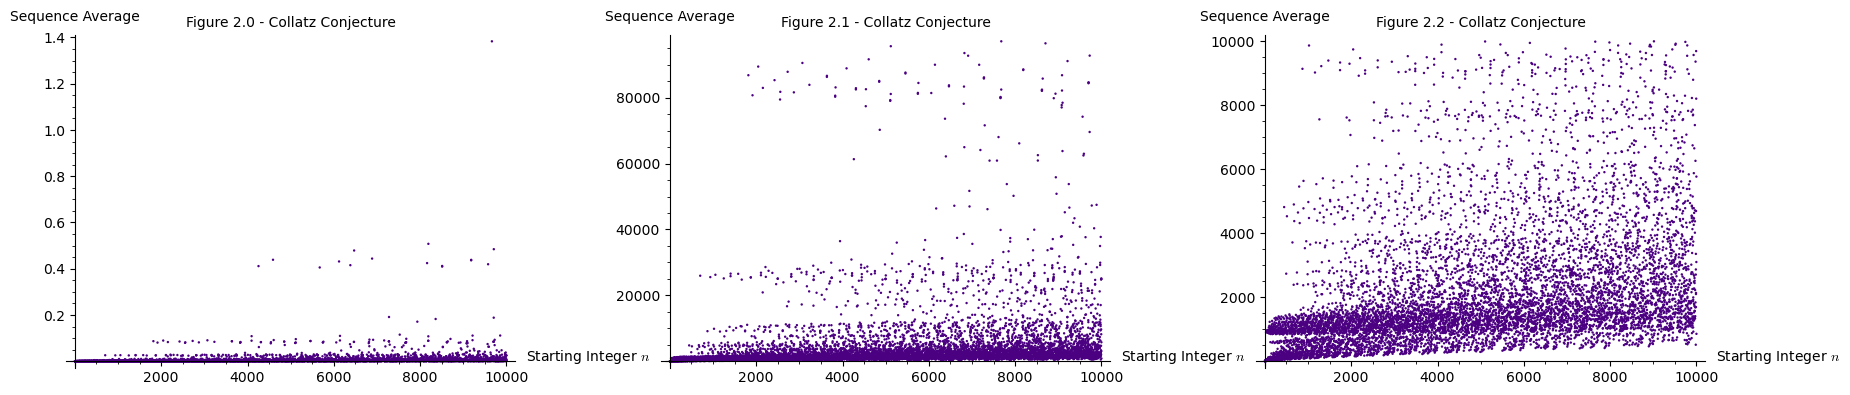

In [52]:
Collatz2Point0 = list_plot([(n,Collatz_Averages(n)) for n in range(1,10001)],color = 'indigo',size=3,title = 'Figure 2.0 - Collatz Conjecture', axes_labels=["Starting Integer $n$","Sequence Average"])
Collatz2Point0.axes_labels_size(1)

Collatz2Point1 = list_plot([(n,Collatz_Averages(n)) for n in range(1,10001) if Collatz_Averages(n) < 100000],color = 'indigo',size=3,title = 'Figure 2.1 - Collatz Conjecture', axes_labels=["Starting Integer $n$","Sequence Average"])
Collatz2Point1.axes_labels_size(1)
Collatz2Point1

Collatz2Point2 = list_plot([(n,Collatz_Averages(n)) for n in range(1,10001) if Collatz_Averages(n) < 10000],color = 'indigo',size=3,title = 'Figure 2.2 - Collatz Conjecture', axes_labels=["Starting Integer $n$","Sequence Average"])
Collatz2Point2.axes_labels_size(1)

a = graphics_array((Collatz2Point0,Collatz2Point1,Collatz2Point2))
a.show(figsize=[18,4])

By using a logarithmic scale on the Sequence Average axis, I may be able to see the plotted points easier.

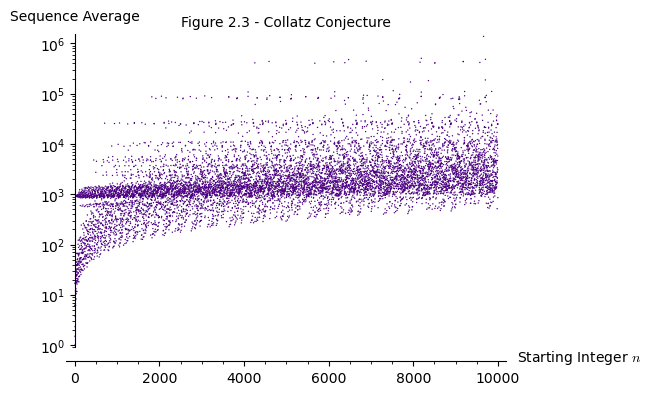

In [24]:
Collatz2Point3 = list_plot([(n,Collatz_Averages(n)) for n in range(1,10001)],color = 'indigo',size=1,title = 'Figure 2.3 - Collatz Conjecture', axes_labels=["Starting Integer $n$","Sequence Average"], scale='semilogy')
Collatz2Point3.axes_labels_size(1)
Collatz2Point3

### Relationship between the lengths of the sequences and the average of the sequence values: ###

In [25]:
for n in range(1,26):
    print((len(Collatz_Conjecture(n)), Collatz_Averages(n)))

(1, 1.00000000000000)
(2, 1.50000000000000)
(8, 6.12500000000000)
(3, 2.33333333333333)
(6, 6.00000000000000)
(9, 6.11111111111111)
(17, 16.9411764705882)
(4, 3.75000000000000)
(20, 16.9500000000000)
(7, 6.57142857142857)
(15, 17.2666666666667)
(10, 6.70000000000000)
(10, 11.9000000000000)
(18, 16.7777777777778)
(18, 38.5555555555556)
(5, 6.20000000000000)
(13, 16.4615384615385)
(21, 17.0000000000000)
(21, 24.7142857142857)
(8, 8.25000000000000)
(8, 18.5000000000000)
(16, 17.5625000000000)
(16, 39.5625000000000)
(11, 8.27272727272727)
(24, 27.4166666666667)


As expected, with a longer sequence, comes a greater average for the most part.

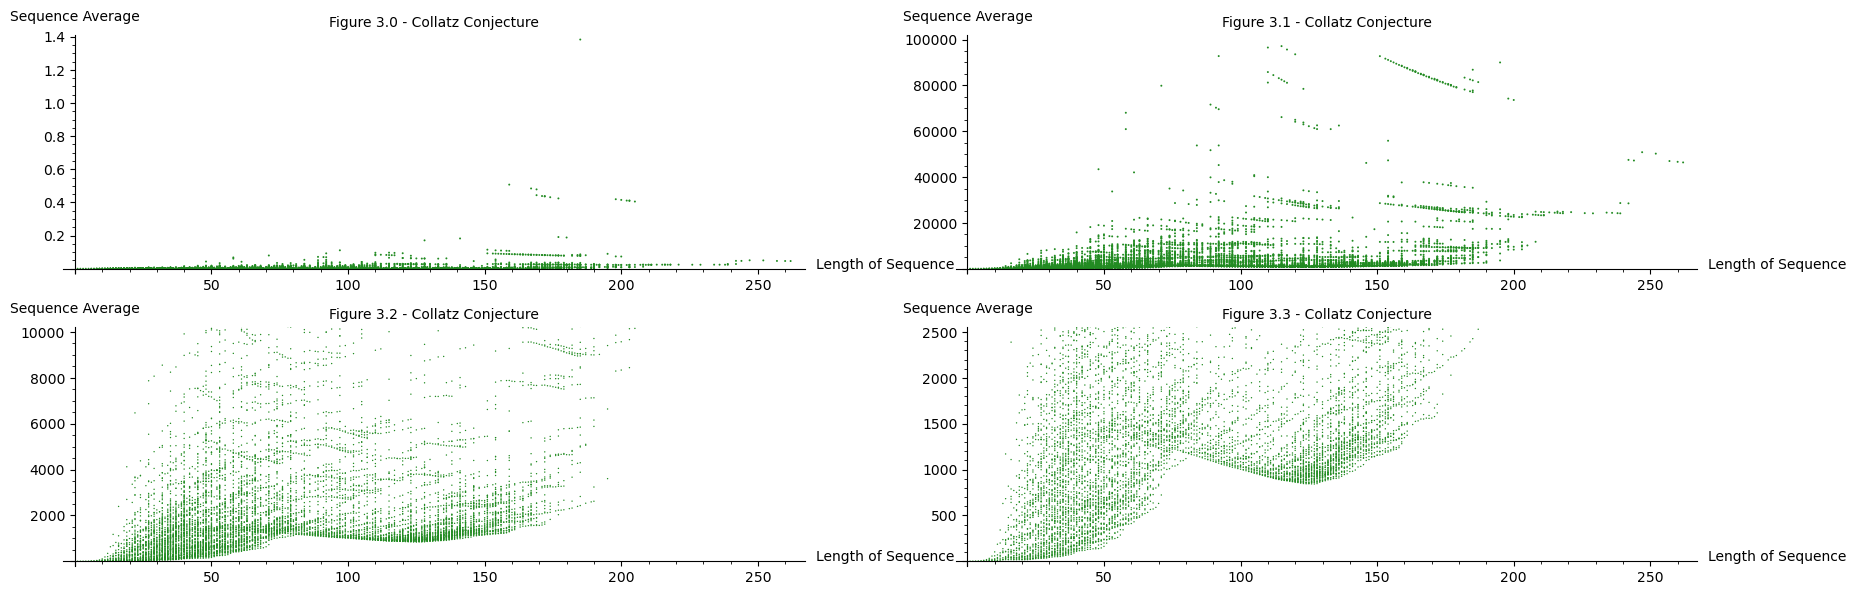

In [26]:
Collatz3Point0 = list_plot([(len(Collatz_Conjecture(n)),(Collatz_Averages(n))) for n in range(1,10001)],color = 'forestgreen',size=2,title = 'Figure 3.0 - Collatz Conjecture',axes_labels=["Length of Sequence","Sequence Average"])
Collatz3Point0.axes_labels_size(1)

Collatz3Point1 = list_plot([(len(Collatz_Conjecture(n)),(Collatz_Averages(n))) for n in range(1,10001)],color = 'forestgreen',size=2,title = 'Figure 3.1 - Collatz Conjecture',axes_labels=["Length of Sequence","Sequence Average"], ymax = 100000)
Collatz3Point1.axes_labels_size(1)

Collatz3Point2 = list_plot([(len(Collatz_Conjecture(n)),(Collatz_Averages(n))) for n in range(1,10001)],color = 'forestgreen',size=1,title = 'Figure 3.2 - Collatz Conjecture',axes_labels=["Length of Sequence","Sequence Average"], ymax=10000)
Collatz3Point2.axes_labels_size(1)

Collatz3Point3 = list_plot([(len(Collatz_Conjecture(n)),(Collatz_Averages(n))) for n in range(1,10001)],color = 'forestgreen',size=1,title = 'Figure 3.3 - Collatz Conjecture',axes_labels=["Length of Sequence","Sequence Average"], ymax=2500)
Collatz3Point3.axes_labels_size(1)

b = graphics_array(((Collatz3Point0,Collatz3Point1),(Collatz3Point2,Collatz3Point3)))
b.show(figsize=[18,6])

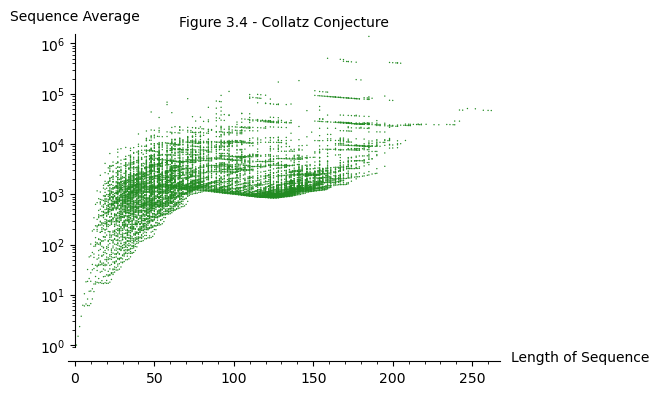

In [27]:
Collatz3Point4 = list_plot([(len(Collatz_Conjecture(n)),(N(Collatz_Averages(n)))) for n in range(1,10001)],color = 'forestgreen',size=1,title = 'Figure 3.4 - Collatz Conjecture',axes_labels=["Length of Sequence","Sequence Average"], scale="semilogy")
Collatz3Point4.axes_labels_size(1)
show(Collatz3Point4)

# Objective 3: I can solve and explain challenging puzzles or mathematical problems using computer software. #

The following problems are from [The Mysterious Math of Perfect Numbers](https://www.quantamagazine.org/the-mysterious-math-of-perfect-numbers-20210315/).

### 1) A number is called “abundant” if it is less than the sum of its proper divisors. For example, $36$ is abundant, since $1 + 2 + 3 + 4 + 6 + 9 + 12 + 18 = 55$, which is greater than $36$. What’s the smallest abundant number?

In [29]:
number = []
d = []
for n in range(1,37):
    if sum(divisors(n)) > 2*n:
        number.append(n) #list of abundant numbers
        d.append(divisors(n)) #list of lists
print(number[0])
print(d[0])

12
[1, 2, 3, 4, 6, 12]


###  2) A number is “deficient” if it is greater than the sum of its proper divisors. For example, 35 is deficient, since 1 + 5 + 7 = 13, which is less than 35. Are prime powers deficient or abundant?

In [30]:
a = []
b = []
for n in range(1,1001):
    if is_pseudoprime_power(n): #prime or integer power of a prime; 7, 11^4, prime^x; all divisors of integer are the same prime integer
        a.append(1)
        if sum(divisors(n)) > 2*n: #abundant
            b.append(0)
        elif sum(divisors(n)) == 2*n: #perfect
            b.append(0)
        else:
            b.append(1) #deficient
if sum(a) == sum(b):
    print("Deficient")

Deficient


###  3) Use the distributive property to multiply $(p – 1)(1 + p + p^2 + p^3 + … + p^n)$ and simplify.

$(p-1)(1+p+p^2+p^3+...+p^n)$

$= p(1+p+p^2+p^3+...+p^n)-1(1+p+p^2+p^3+...+p^n)$

$= (p+p^2+p^3+...+p^{n+1}) - (1+p+p^2+p^3+...+p^n)$

$= p+p^2+p^3+...+p^{n+1} - 1 - p - p^2 - p^3 - ... - p^n$

$= p^{n+1} - 1$

### 4)Suppose $n$ is an odd number and assume that $m = 2n$ and is perfect. Show that $n$ must be equal to $3$.

In [31]:
for n in range(1,100000,2):
    m = 2*n
    if sum(divisors(m)) == 2*m:
        print("n must be equal to", n)

n must be equal to 3


In [32]:
for n in range(1,1000000):
    if sum(divisors(n)) == 2*n:
        print(n)
        print(divisors(n))
        print("")
print(33550336)
print(divisors(33550336))

6
[1, 2, 3, 6]

28
[1, 2, 4, 7, 14, 28]

496
[1, 2, 4, 8, 16, 31, 62, 124, 248, 496]

8128
[1, 2, 4, 8, 16, 32, 64, 127, 254, 508, 1016, 2032, 4064, 8128]



33550336
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8191, 16382, 32764, 65528, 131056, 262112, 524224, 1048448, 2096896, 4193792, 8387584, 16775168, 33550336]
